## SmartHealth: St Petersburg INCART 12-lead Arrhythmia Database - Disease Classification using Neural Networks

[PhysioNet St Petersburg INCART 12-lead Arrhythmia Database](https://physionet.org/content/incartdb/1.0.0/)

- [Lightwave Visualization](https://physionet.org/lightwave/?db=incartdb/1.0.0)

- [Record Descriptions](https://physionet.org/content/incartdb/1.0.0/record-descriptions.txt)

- [Patient File Diagnoses](https://physionet.org/content/incartdb/1.0.0/files-patients-diagnoses.txt)

[PhysioBank Annotations](https://archive.physionet.org/physiobank/annotations.shtml)


[Leads, Rate, Rhythm, and Cardiac Axis (NIH PMC)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1122339/)


[Interpreting 12-Lead ECGs: A Piece by Piece Analysis](https://www.nursingcenter.com/ce_articleprint?an=00006205-200810000-00008)


[Alila Medical Media - Cardiology](https://www.youtube.com/playlist?list=PLJIs8ZcKXHUwdmQl1hxgtiTrKS1mOoVSi)

Assignment 3:  Devika Pace


### Install Signal Processing Libraries - WFDB, Neurokit, Biosppy

In [1]:
!pip install wfdb

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!pip install neurokit2

In [3]:
!pip install biosppy

In [4]:
!pip install peakutils

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import os
import shutil
import posixpath

import wfdb
from wfdb import processing
import neurokit2 as nk
import biosppy

### Download files from PhysioNet INCART Database

In [6]:
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

In [7]:
# Download all the WFDB records and annotations from a small Physionet Database
# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('incartdb', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

# Cleanup: delete the downloaded directory
# shutil.rmtree(dl_dir)

Generating record list for: I01
Generating record list for: I02
Generating record list for: I03
Generating record list for: I04
Generating record list for: I05
Generating record list for: I06
Generating record list for: I07
Generating record list for: I08
Generating record list for: I09
Generating record list for: I10
Generating record list for: I11
Generating record list for: I12
Generating record list for: I13
Generating record list for: I14
Generating record list for: I15
Generating record list for: I16
Generating record list for: I17
Generating record list for: I18
Generating record list for: I19
Generating record list for: I20
Generating record list for: I21
Generating record list for: I22
Generating record list for: I23
Generating record list for: I24
Generating record list for: I25
Generating record list for: I26
Generating record list for: I27
Generating record list for: I28
Generating record list for: I29
Generating record list for: I30
Generating record list for: I31
Generati

['I44.atr',
 'I71.hea',
 'I25.hea',
 'I20.dat',
 'I65.dat',
 'I45.dat',
 'I68.atr',
 'I60.hea',
 'I72.hea',
 'I03.hea',
 'I51.atr',
 'I47.hea',
 'I67.atr',
 'I05.atr',
 'I13.dat',
 'I56.dat',
 'I18.atr',
 'I53.hea',
 'I34.dat',
 'I10.dat',
 'I37.hea',
 'I05.dat',
 'I07.hea',
 'I27.atr',
 'I40.hea',
 'I11.dat',
 'I37.dat',
 'I75.atr',
 'I04.atr',
 'I58.hea',
 'I61.hea',
 'I65.atr',
 'I22.hea',
 'I12.dat',
 'I54.hea',
 'I44.hea',
 'I39.hea',
 'I39.dat',
 'I30.atr',
 'I10.hea',
 'I02.hea',
 'I38.hea',
 'I75.hea',
 'I09.atr',
 'I38.dat',
 'I43.atr',
 'I16.dat',
 'I51.hea',
 'I29.dat',
 'I43.dat',
 'I02.dat',
 'I63.dat',
 'I33.dat',
 'I50.hea',
 'I56.atr',
 'I52.hea',
 'I73.atr',
 'I15.atr',
 'I64.atr',
 'I61.atr',
 'I63.hea',
 'I19.dat',
 'I54.dat',
 'I08.atr',
 'I74.hea',
 'I12.hea',
 'I48.dat',
 'I35.atr',
 'I50.dat',
 'I34.hea',
 'I69.dat',
 'I17.atr',
 'I16.hea',
 'I32.dat',
 'I61.dat',
 'I11.atr',
 'I06.atr',
 'I46.dat',
 'I12.atr',
 'I74.dat',
 'I24.atr',
 'I10.atr',
 'I26.hea',
 'I2

In [1]:
#!pip install matplotlib==3.1.3

### EDA

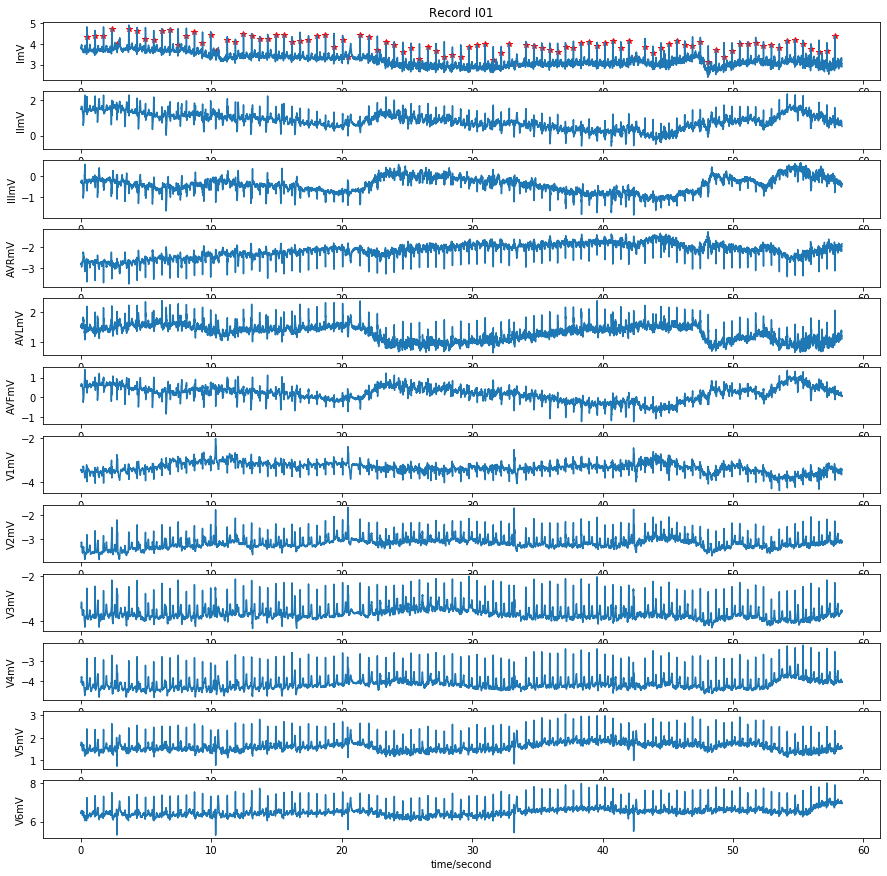

In [9]:
# Read a WFDB record and annotation. Plot all channels, and the annotation on top of channel 0.
record = wfdb.rdrecord('/content/tmp_dl_dir/I01', sampto = 15000)
annotation = wfdb.rdann('/content/tmp_dl_dir/I01', 'atr', sampto = 15000)

from pylab import rcParams
rcParams['figure.figsize'] = 15,15

wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds', title='Record I01')

In [10]:
display(record.__dict__)

{'adc_gain': [306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0,
  306.0],
 'adc_res': [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'byte_offset': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'checksum': [45915,
  19370,
  28951,
  36744,
  4279,
  48597,
  50823,
  1143,
  53553,
  1654,
  45377,
  33137],
 'comments': ['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension',
  'patient 1',
  'PVCs, noise'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
  'I01.dat',
 

In [11]:
signals, fields = wfdb.rdsamp('/content/tmp_dl_dir/I01', channels=[0,1,2,3,4,5,6,7,8,9,10,11])
print(f'signal shape: {signals.shape}')
print(f'signal (sec): {len(signals)/257}')
print(f'signal (min): {len(signals)/257/60}')
print(f'signal length/min: {len(signals)/30}')

signal shape: (462600, 12)
signal (sec): 1800.0
signal (min): 30.0
signal length/min: 15420.0


We will subdivide each signal into 30 rows so that each row represents 1 minute of data.  We end up with 2250 rows of data (75 recording x 30 minutes), each 15420 ticks long.  This is for just one channel, or 1/12 of the dataset.  We'll then add metadata for each row indicating channel, patient, and diagnostic finding, be it Coronary Heart Disease (CAD), Myocardial Infarction (MI), Transient Ischemic Attack (TIA), or default alternate category (Other).

### View Lead II


We will attempt analysis with lead II which represents the general direction of depolarization from SA Node (top-right) towards the ventricular apex (bottom-left).  This is represented by channel 1 (being the second channel from 0-11).

In [12]:
# Read specific channels and sections of the WFDB record using the simplified 'rdsamp' function
signals_ch1, fields = wfdb.rdsamp('/content/tmp_dl_dir/I01', channels=[1], sampfrom=257, sampto=1500)
display(signals_ch1)
display(fields)

array([[1.53267974],
       [1.49346405],
       [1.41176471],
       ...,
       [1.32352941],
       [1.29411765],
       [1.23856209]])

{'base_date': None,
 'base_time': None,
 'comments': ['<age>: 65 <sex>: F <diagnoses> Coronary artery disease, arterial hypertension',
  'patient 1',
  'PVCs, noise'],
 'fs': 257,
 'n_sig': 1,
 'sig_len': 1243,
 'sig_name': ['II'],
 'units': ['mV']}

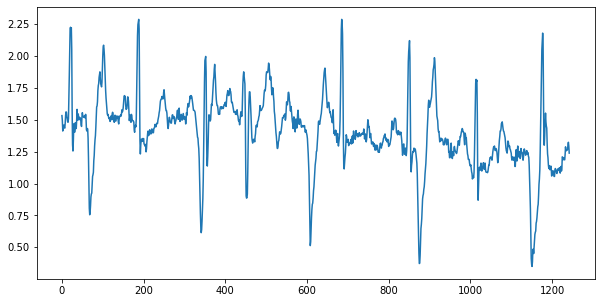

In [13]:
plt.figure(figsize=(10,5))
plt.plot(signals_ch1);

In [14]:
# Use the GQRS detection algorithm and correct the peaks
def peaks_hr(sig, peak_inds, fs, title, figsize=(10, 5), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    # plot signal
    ax_left.plot(sig, color='#3979f0', label='Signal')
    # mark peaks
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

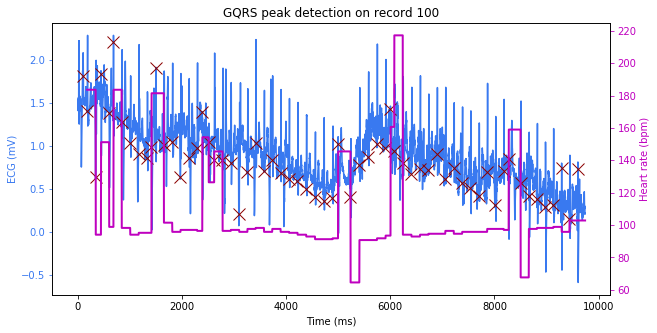

Corrected GQRS detected peak indices: [102, 188, 352, 506, 644, 685, 851, 1014, 1177, 1337, 1462, 1500, 1659, 1822, 1980, 2140, 2299, 2456, 2457, 2628, 2788, 2946, 3124, 3265, 3422, 3584, 3742, 3903, 4065, 4229, 4393, 4564, 4732, 4901, 5060, 5244, 5415, 5586, 5753, 5918, 6004, 6086, 6250, 6416, 6580, 6742, 6906, 7066, 7229, 7389, 7549, 7710, 7869, 8027, 8187, 8335, 8512, 8669, 8827, 8982, 9138, 9292, 9451, 9604]


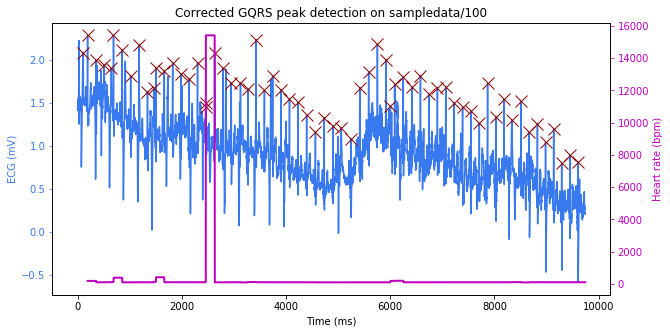

In [15]:
# Load the WFDB record and the physical samples
record = wfdb.rdrecord('/content/tmp_dl_dir/I01', sampfrom=257, sampto=10000, channels=[1])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm

# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")

Alternate View: Leads I, II, V5

Lead I


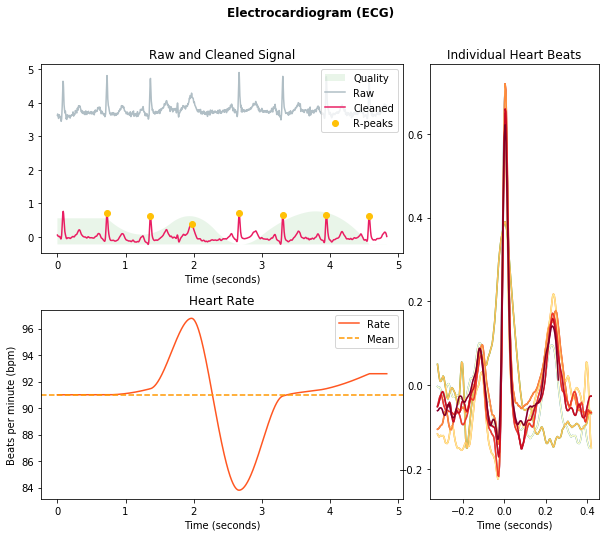

In [16]:
print('Lead I')
rcParams['figure.figsize'] = 10, 8
# Process it
signals_ch0, fields_ch0 = wfdb.rdsamp('/content/tmp_dl_dir/I01', channels=[0], sampfrom=257, sampto=1500)
signals_ch0, info = nk.ecg_process(signals_ch0.flatten() , sampling_rate=250)
# Visualise the processing
_ = nk.ecg_plot(signals_ch0, sampling_rate=257)

In [17]:
signals_ch0.head()

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,3.620915,0.053844,91.001011,0.822923,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,3.663399,0.041700,91.001011,0.822923,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,3.620915,0.029163,91.001011,0.822923,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,3.575163,0.019242,91.001011,0.822923,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,3.535948,0.012589,91.001011,0.822923,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [18]:
info

{'ECG_R_Peaks': array([ 187,  351,  506,  685,  850, 1014, 1176]),
 'sampling_rate': 250}

Lead II


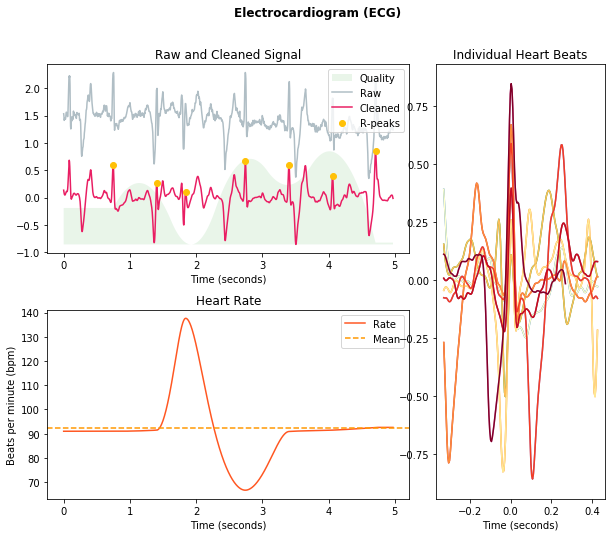

In [19]:
print('Lead II')
signals, info = nk.ecg_process(signals_ch1.flatten() , sampling_rate=250)
_ = nk.ecg_plot(signals, sampling_rate=250)

In [20]:
signals.head()

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,1.532680,0.134339,91.001011,0.381355,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,1.493464,0.102706,91.001011,0.381355,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,1.411765,0.073426,91.001011,0.381355,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,1.424837,0.054213,91.001011,0.381355,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,1.457516,0.046113,91.001011,0.381355,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


Lead V5


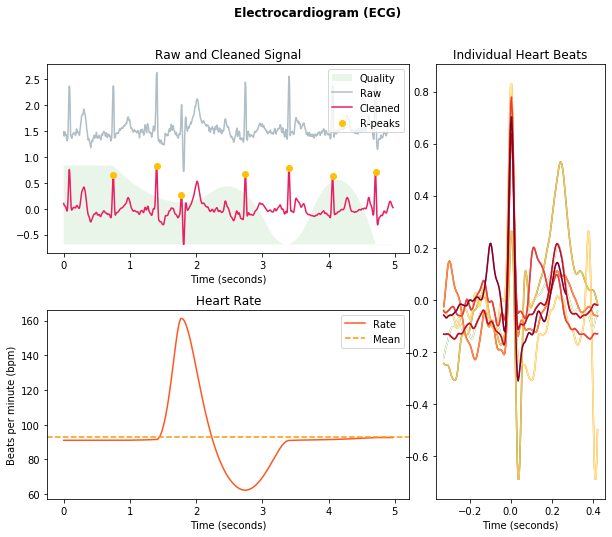

In [21]:
print('Lead V5')
signals_ch10, fields_ch10 = wfdb.rdsamp('/content/tmp_dl_dir/I01', channels=[10], sampfrom=257, sampto=1500)
signals_ch10, info = nk.ecg_process(signals_ch10.flatten(), sampling_rate=250)
_ = nk.ecg_plot(signals_ch10, sampling_rate=250)

In [22]:
signals_ch10.head()

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,1.486928,0.101014,91.001011,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,1.441176,0.083234,91.001011,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,1.401961,0.068199,91.001011,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,1.424837,0.060094,91.001011,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,1.473856,0.057611,91.001011,1.0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


### Load INCART files to DataFrame

In [23]:
# Get annnotated record names
ecg_records = list(set([name[:3] for name in os.listdir(dl_dir)]))
ecg_records.sort()
print('Files downloaded: ', len(os.listdir(dl_dir)))
print('Annotated recordings: ', len(ecg_records))
print(ecg_records)

Files downloaded:  225
Annotated recordings:  75
['I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I29', 'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40', 'I41', 'I42', 'I43', 'I44', 'I45', 'I46', 'I47', 'I48', 'I49', 'I50', 'I51', 'I52', 'I53', 'I54', 'I55', 'I56', 'I57', 'I58', 'I59', 'I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70', 'I71', 'I72', 'I73', 'I74', 'I75']


In [24]:
# Diagnoses
Findings = {'CAD':'Coronary artery disease',
            'MI':'Acute MI',
            'TIA':'Transient ischemic attack',
            'Other': 'Other'}

### Create Single Channel Dataset (minute samples)

Subdivide each signal into 30 single minute rows, as described above, and add metadata.

In [25]:
def create_1D_dataset(ecg_records=ecg_records, dir='tmp_dl_dir', channel=1, num_minutes=30):
  df_cnn = pd.DataFrame()
  for idx, r in enumerate(ecg_records):
    signal, fields = wfdb.rdsamp(f'{dir}/{r}', channels=[channel])
    min_signals = np.array(np.split(signal, num_minutes)).squeeze()
    comments = fields['comments'][0]
    df = pd.DataFrame(min_signals)
    df['channel'] = fields['sig_name'][0]
    df['patient'] = r
    df['target'] = np.select(
      [Findings['CAD'] in comments, 
       Findings['MI'] in comments, 
       Findings['TIA'] in comments], 
      ['CAD', 'MI', 'TIA'], 
      default='Other'
    )
    df_cnn = df_cnn.append(df, ignore_index=True)
  return df_cnn

In [26]:
df_cnn = create_1D_dataset(channel=1)
df_cnn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15383,15384,15385,15386,15387,15388,15389,15390,15391,15392,15393,15394,15395,15396,15397,15398,15399,15400,15401,15402,15403,15404,15405,15406,15407,15408,15409,15410,15411,15412,15413,15414,15415,15416,15417,15418,15419,channel,patient,target
0,1.493464,1.477124,1.496732,1.509804,1.500000,1.522876,1.545752,1.604575,1.633987,1.643791,1.624183,1.627451,1.650327,1.611111,1.598039,1.601307,1.594771,1.562092,1.549020,1.496732,1.509804,1.513072,1.519608,1.496732,1.444444,1.428105,1.388889,1.385621,1.385621,1.375817,1.362745,1.330065,1.303922,1.316993,1.313725,1.297386,1.271242,1.245098,1.222222,1.169935,...,0.852941,0.931373,0.934641,0.960784,1.013072,0.964052,0.869281,0.872549,0.918301,0.908497,0.810458,0.843137,0.882353,0.869281,0.879085,0.875817,0.803922,0.725490,0.751634,0.715686,0.633987,0.624183,0.666667,0.692810,0.699346,0.758170,0.754902,0.679739,0.640523,0.666667,0.699346,0.732026,0.718954,0.715686,0.735294,0.620915,0.620915,II,I01,CAD
1,0.673203,0.718954,0.620915,0.601307,0.702614,0.732026,0.748366,0.673203,0.588235,0.575163,0.656863,0.712418,0.728758,0.751634,0.679739,0.647059,0.705882,0.656863,0.627451,0.732026,0.692810,0.663399,0.712418,0.712418,0.748366,0.705882,0.643791,0.679739,0.732026,0.797386,0.879085,0.882353,0.833333,0.816993,0.862745,0.879085,0.869281,0.839869,0.758170,0.732026,...,5.666667,5.709150,5.676471,5.689542,5.764706,5.712418,5.630719,5.633987,5.558824,5.598039,5.617647,5.526144,5.532680,5.591503,5.568627,5.526144,5.496732,5.441176,5.431373,5.444444,5.434641,5.431373,5.398693,5.415033,5.434641,5.434641,5.437908,5.415033,5.372549,5.346405,5.369281,5.428105,5.490196,5.441176,5.349673,5.330065,5.372549,II,I01,CAD
2,5.421569,5.418301,5.424837,5.470588,5.431373,5.408497,5.375817,5.392157,5.411765,5.444444,5.441176,5.421569,5.450980,5.441176,5.415033,5.428105,5.441176,5.418301,5.411765,5.431373,5.434641,5.428105,5.382353,5.375817,5.362745,5.339869,5.349673,5.349673,5.382353,5.424837,5.401961,5.437908,5.496732,5.519608,5.516340,5.496732,5.460784,5.428105,5.421569,5.500000,...,0.882353,0.866013,0.882353,0.895425,0.898693,0.908497,0.905229,0.888889,0.879085,0.915033,0.928105,0.866013,0.830065,0.905229,0.879085,0.921569,0.960784,0.931373,0.928105,0.882353,0.908497,0.826797,0.741830,0.833333,0.787582,0.725490,0.748366,0.715686,0.692810,0.696078,0.692810,0.692810,0.715686,0.712418,0.647059,0.568627,0.545752,II,I01,CAD
3,0.571895,0.617647,0.660131,0.633987,0.549020,0.539216,0.581699,0.604575,0.571895,0.568627,0.575163,0.552288,0.594771,0.607843,0.594771,0.555556,0.539216,0.571895,0.578431,0.555556,0.558824,0.555556,0.545752,0.545752,0.519608,0.513072,0.545752,0.522876,0.500000,0.483660,0.496732,0.486928,0.473856,0.506536,0.545752,0.503268,0.437908,0.457516,0.526144,0.490196,...,-1.124183,-1.124183,-1.124183,-1.140523,-1.147059,-1.098039,-1.094771,-1.098039,-1.098039,-1.094771,-1.078431,-1.068627,-1.075163,-1.101307,-1.156863,-1.196078,-1.199346,-1.189542,-1.160131,-1.169935,-1.192810,-1.228758,-1.254902,-1.271242,-1.274510,-1.297386,-1.349673,-1.359477,-1.385621,-1.398693,-1.388889,-1.375817,-1.395425,-1.392157,-1.362745,-1.379085,-1.431373,II,I01,CAD
4,-1.464052,-1.464052,-1.447712,-1.434641,-1.310458,-1.111111,-0.895425,-0.679739,-0.617647,-0.673203,-0.696078,-0.810458,-1.271242,-1.630719,-1.640523,-1.532680,-1.428105,-1.405229,-1.415033,-1.424837,-1.437908,-1.418301,-1.408497,-1.431373,-1.441176,-1.421569,-1.392157,-1.382353,-1.379085,-1.375817,-1.359477,-1.385621,-1.411765,-1.405229,-1.418301,-1.424837,-1.366013,-1.326797,-1.326797,-1.362745,...,-3.990196,-3.990196,-3.954248,-3.924837,-3.911765,-3.905229,-3.888889,-3.918301,-3.892157,-3.856209,-3.839869,-3.879085,-3.830065,-3.836601,-3.856209,-3.882353,-3.846405,-3.816993,-3.826797,-3.846405,-3.885621,-3.875817,-3.852941,-3.797386,-3.807190,-3.849673,-3.810458,-3.781046,-3.784314,-3.781046,-3.764706,-3.696078,-3.715686,-3.725490,-3.738562,-3.7516

In [27]:
df_cnn.to_csv('df_cnn.csv', index=False)

In [28]:
df_cnn.target.value_counts()

Other    1350
CAD       510
TIA       210
MI        180
Name: target, dtype: int64

In [29]:
df_cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Columns: 15423 entries, 0 to target
dtypes: float64(15420), object(3)
memory usage: 264.8+ MB


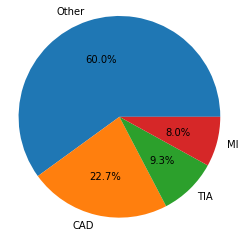

In [30]:
#pie chart of target class
target_dist=df_cnn['target'].value_counts()
fig, ax = plt.subplots(figsize=(4,4)) 
my_circle=plt.Circle( (0,0), 0.7)
ax.pie(target_dist, labels=['Other','CAD','TIA','MI'],autopct='%1.1f%%')
ax.axis('equal') 
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X = df_cnn.drop(['target', 'patient', 'channel'], axis=1)
y = df_cnn['target']

In [32]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
cat_y = to_categorical(encoded_y)
cat_y.shape

(2250, 4)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, cat_y, stratify=y, test_size=0.25, random_state=33)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1687, 15420), (563, 15420), (1687, 4), (563, 4))

In [35]:
X_train = X_train.values
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.values
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1687, 15420, 1) (563, 15420, 1) (1687, 4) (563, 4)


### Part 1:  Convolutional Neural Net (CNN) Architecture

Without having featurized the signals, we will first examine performance of a CNN.


In [36]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [37]:
def network(X_train,y_train,X_test,y_test, num_epochs):
    
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end1 = Dropout(0.5)(dense_end1)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    dense_end2 = Dropout(0.5)(dense_end2)
    main_output = Dense(4, activation='softmax', name='main_output')(dense_end2)
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    callbacks = [EarlyStopping(monitor='val_loss', mode='min',patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=num_epochs, callbacks=callbacks, batch_size=32, validation_data=(X_test,y_test))
  
    model.load_weights('best_model.h5')
    return(model,history)

In [52]:
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from warnings import simplefilter

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_scores(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred):0.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred, average="macro"):0.2f}')
    print(f'Precision: {precision_score(y_test, y_pred, average="macro"):0.2f}')
    print(f'Recall: {recall_score(y_test, y_pred, average="macro"):0.2f}')

In [39]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots(figsize=(5,5))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')

    plt.show();
    
    fig2, ax_loss = plt.subplots(figsize=(5,5))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'], loc='upper right')

    plt.show();
    target_names=['CAD','MI','Other','TIA']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [40]:
from time import time
t0 = time()
model,history=network(X_train,y_train,X_test,y_test, 15)
t1 = time()
print(f'elapsed time: {t1-t0}')

Epoch 1/15
53/53 [==============================] - 13s 181ms/step - loss: 51.5457 - accuracy: 0.3693 - val_loss: 8.9236 - val_accuracy: 0.5524
Epoch 2/15
53/53 [==============================] - 9s 166ms/step - loss: 29.0746 - accuracy: 0.4149 - val_loss: 5.4960 - val_accuracy: 0.5595
Epoch 3/15
53/53 [==============================] - 9s 165ms/step - loss: 13.1305 - accuracy: 0.4209 - val_loss: 3.7083 - val_accuracy: 0.5826
Epoch 4/15
53/53 [==============================] - 9s 166ms/step - loss: 9.3170 - accuracy: 0.4487 - val_loss: 1.9586 - val_accuracy: 0.5560
Epoch 5/15
53/53 [==============================] - 9s 166ms/step - loss: 4.9278 - accuracy: 0.4772 - val_loss: 1.3063 - val_accuracy: 0.5790
Epoch 6/15
53/53 [==============================] - 9s 166ms/step - loss: 2.8788 - accuracy: 0.5056 - val_loss: 1.2792 - val_accuracy: 0.5897
Epoch 7/15
53/53 [==============================] - 9s 162ms/step - loss: 2.8673 - accuracy: 0.5228 - val_loss: 1.4226 - val_accuracy: 0.5275
Ep

In [41]:
y_pred=model.predict(X_test)

Accuracy: 61.46%


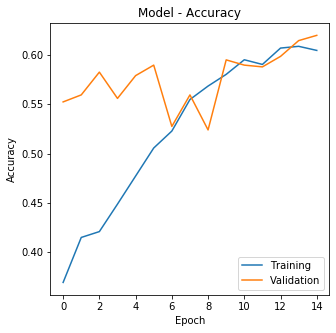

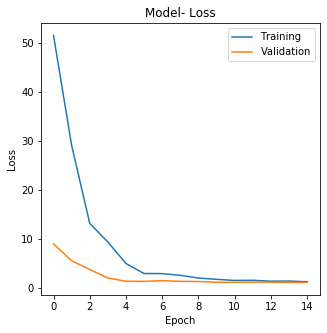

In [42]:
evaluate_model(history,X_test,y_test,model)

Confusion matrix, without normalization


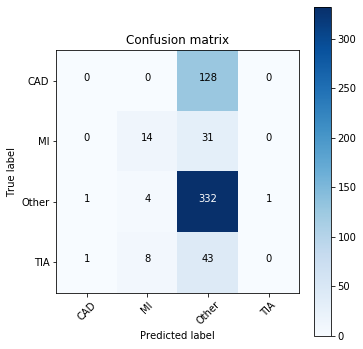

Accuracy: 0.61
F1 Score: 0.29
Precision: 0.29
Recall: 0.32


In [53]:
# Compute confusion matrix
simplefilter('ignore')
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['CAD','MI','Other','TIA'], normalize=False,
                      title='Confusion matrix')
plt.show()
print_scores(y_test.argmax(axis=1), y_pred.argmax(axis=1))

We are only getting correctly classified items in the majority class.  Clearly, we have an imbalanced dataset which we will resample in an attempt to improve results.

### Imbalanced Dataset: Resample Class Distribution (training set only)

In [45]:
#data resampling for making a balanced dataset
from sklearn.utils import resample
df_0=(df_cnn[df_cnn['target']=='Other']).sample(n=1350,random_state=42)
df_1=df_cnn[df_cnn['target']=='CAD']
df_2=df_cnn[df_cnn['target']=='TIA']
df_3=df_cnn[df_cnn['target']=='MI']
print(len(df_0), len(df_1), len(df_2),len(df_3))
df_1_upsample=resample(df_1,replace=True,n_samples=1350,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=1350,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=1350,random_state=125)
print(len(df_0), len(df_1_upsample), len(df_2_upsample),len(df_3_upsample))

df_resampled=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample])

1350 510 210 180
1350 1350 1350 1350


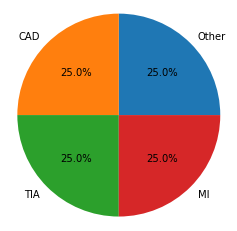

In [46]:
target_dist_resampled=df_resampled['target'].value_counts()
fig1, ax = plt.subplots(figsize=(4,4))
my_circle=plt.Circle((0,0), 0.7)
ax.pie(target_dist_resampled, labels=['Other','CAD','TIA','MI'],autopct='%1.1f%%')
ax.axis('equal') 
plt.show()

In [47]:
X = df_resampled.drop(['target', 'patient', 'channel'], axis=1)
y = df_resampled['target']

In [48]:
encoded_y = encoder.transform(y)
y_train = to_categorical(encoded_y)
y_train.shape

(5400, 4)

In [49]:
X_train = X.values
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_train.shape

(5400, 15420, 1)

In [54]:
t0 = time()
model,history=network(X_train,y_train,X_test,y_test, 15)
t1 = time()
print(f'elapsed time: {t1-t0}')

Epoch 1/15
169/169 [==============================] - 28s 157ms/step - loss: 24.7150 - accuracy: 0.3219 - val_loss: 3.9978 - val_accuracy: 0.1492
Epoch 2/15
169/169 [==============================] - 26s 153ms/step - loss: 3.8685 - accuracy: 0.3567 - val_loss: 1.7407 - val_accuracy: 0.2682
Epoch 3/15
169/169 [==============================] - 26s 153ms/step - loss: 1.7274 - accuracy: 0.4235 - val_loss: 1.3468 - val_accuracy: 0.4281
Epoch 4/15
169/169 [==============================] - 26s 154ms/step - loss: 1.4090 - accuracy: 0.4433 - val_loss: 1.1422 - val_accuracy: 0.6714
Epoch 5/15
169/169 [==============================] - 26s 154ms/step - loss: 1.2671 - accuracy: 0.4539 - val_loss: 1.1196 - val_accuracy: 0.6572
Epoch 6/15
169/169 [==============================] - 26s 154ms/step - loss: 1.2026 - accuracy: 0.4691 - val_loss: 1.1020 - val_accuracy: 0.7069
Epoch 7/15
169/169 [==============================] - 26s 154ms/step - loss: 1.1436 - accuracy: 0.4809 - val_loss: 1.0755 - val_a

In [55]:
y_pred=model.predict(X_test)

Accuracy: 75.84%


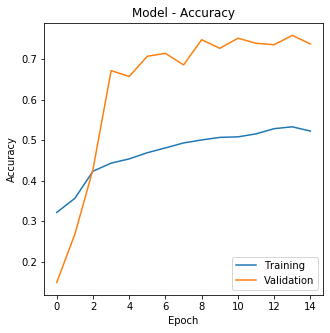

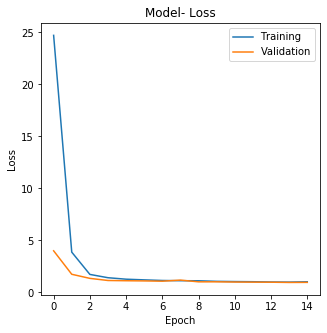

In [56]:
evaluate_model(history,X_test,y_test,model)

Confusion matrix, without normalization


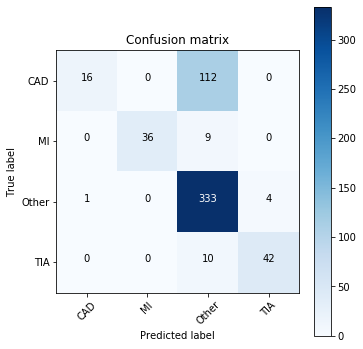

Accuracy: 0.76
F1 Score: 0.70
Precision: 0.89
Recall: 0.68


In [57]:
simplefilter('ignore')
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes=['CAD','MI','Other','TIA'], normalize=False,
                      title='Confusion matrix')
plt.show()
print_scores(y_test.argmax(axis=1), y_pred.argmax(axis=1))

The balanced dataset well outperforms original distribution. 

### Part II:  Artificial Neural Network (with Feature Extraction)

Utilize the same raw data for Channel 1 (Lead II) dataset above, but featurize using neurokit2 transformation of the ecg signal.

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5400, 15420, 1), (563, 15420, 1), (5400, 4), (563, 4))

In [59]:
X_train_r = X_train.squeeze()
X_test_r = X_test.squeeze()

In [62]:
def create_ecg_features(signal):
  peaks, info = nk.ecg_peaks(signal)
  hrv_indices = nk.hrv(peaks, show=False)
  #print(hrv_indices.shape, hrv_indices.columns)
  return hrv_indices

In [61]:
simplefilter('ignore')
create_ecg_features(X_train_r[0,:])

(1, 72) Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2',
       'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_RMSSD', 'HRV_SDSD',
       'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN',
       'HRV_IQRNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_HTI', 'HRV_TINN', 'HRV_ULF',
       'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_LFHF', 'HRV_LFn',
       'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'HRV_S',
       'HRV_CSI', 'HRV_CVI', 'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS',
       'HRV_PSS', 'HRV_PAS', 'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d',
       'HRV_C1a', 'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 'HRV_C2a', 'HRV_SD2d',
       'HRV_SD2a', 'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa',
       'HRV_DFA_alpha1', 'HRV_DFA_alpha1_ExpRange', 'HRV_DFA_alpha1_ExpMean',
       'HRV_DFA_alpha1_DimRange', 'HRV_DFA_alpha1_DimMean', 'HRV_ApEn',
       'HRV_SampEn', 'HRV_ShanEn', 'HRV_FuzzyEn', 'HRV_MSE', 'HRV_CMSE',
       'HRV_RCMSE', 'HRV_CD

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_DFA_alpha1,HRV_DFA_alpha1_ExpRange,HRV_DFA_alpha1_ExpMean,HRV_DFA_alpha1_DimRange,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,455.9375,122.089586,NaN,NaN,NaN,NaN,NaN,NaN,177.881258,180.731602,0.267777,0.390144,411.0,14.0847,0.034269,18.0,28.125,31.25,3.555556,39.0625,NaN,NaN,NaN,0.099229,NaN,NaN,NaN,1.0,-2.31033,127.796541,117.298173,1.089502,47093.418653,0.917851,5.37993,430.648942,0.6875,0.714286,0.9,0.5,53.138528,53.737353,52.442916,46.428571,0.501366,0.498634,90.534248,90.287227,0.493078,0.506922,82.366207,83.514485,0.497578,0.502422,86.546641,86.966811,0.548495,3.4119,1.609574,1.964939,0.309709,0.340437,0.339619,4.47641,0.467991,NaN,NaN,NaN,0.252642,1.930996,1.877288,1.5625


In [65]:
def create_featurized_dataset(X):
  df_nn = pd.DataFrame()
  # vectorizing errors out
  for idx, i in enumerate(X):
    try:
      feature = create_ecg_features(X[idx, :])
      feature['idx'] = idx
      df_nn = df_nn.append(feature, ignore_index=True)
      if idx%1000 == 0:
        print(idx)
    except Exception:
      #print(Exception)
      pass
  return df_nn

In [64]:
df_nn = create_featurized_dataset(X_train_r)
df_nn

0
1000
2000
3000
4000
5000


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_DFA_alpha1,HRV_DFA_alpha1_ExpRange,HRV_DFA_alpha1_ExpMean,HRV_DFA_alpha1_DimRange,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,idx
0,455.937500,122.089586,NaN,NaN,NaN,NaN,NaN,NaN,177.881258,180.731602,0.267777,0.390144,411.0,14.0847,0.034269,18.00,28.125000,31.250000,3.555556,39.0625,NaN,NaN,NaN,0.099229,NaN,NaN,NaN,1.0,-2.310330,127.796541,117.298173,1.089502,4.709342e+04,0.917851,5.379930,430.648942,0.687500,0.714286,0.900000,0.500000,53.138528,53.737353,52.442916,46.428571,0.501366,0.498634,90.534248,90.287227,0.493078,0.506922,82.366207,83.514485,0.497578,0.502422,86.546641,86.966811,0.548495,3.411900,1.609574,1.964939,0.309709,0.340437,0.339619,4.476410,0.467991,NaN,NaN,NaN,0.252642,1.930996,1.877288,1.562500,0
1,1229.166667,1434.138882,NaN,NaN,NaN,NaN,NaN,NaN,1231.808574,1228.487614,1.166757,1.002149,591.5,335.8089,0.567724,839.75,75.000000,83.333333,12.000000,0.0000,NaN,NaN,NaN,0.009349,NaN,NaN,NaN,1.0,-4.672494,868.671923,1375.928500,0.631335,3.754927e+06,1.583945,7.281572,8717.579961,0.583333,0.727273,0.875000,0.500000,27.615286,44.266982,12.039933,45.454545,0.107564,0.892436,299.610831,863.004722,0.122168,0.877832,480.921949,1289.144412,0.117700,0.882300,400.657317,1096.966377,0.360987,1.421860,0.679322,1.358898,0.344319,0.453340,1.945910,3.584963,0.884670,NaN,NaN,NaN,0.691513,1.902497,1.346995,1.792481,1
2,738.000000,432.445576,NaN,NaN,NaN,NaN,NaN,NaN,547.555960,564.375195,0.585970,0.741946,675.0,423.2823,0.627085,573.75,77.777778,88.888889,18.000000,0.0000,NaN,NaN,NaN,0.064765,NaN,NaN,NaN,1.0,-2.736984,399.073527,487.312072,0.818928,6.109560e+05,1.221108,6.492980,2380.243629,0.555556,0.647059,0.818182,0.000000,49.329399,48.708579,48.864717,52.941176,0.448642,0.551358,267.317695,296.343234,0.583892,0.416108,372.368793,314.347796,0.529595,0.470405,324.127497,305.478190,0.750915,1.306633,1.066978,1.452884,0.392713,0.248640,inf,4.169925,2.046742,NaN,NaN,NaN,0.827066,2.054238,2.857784,1.389975,2
3,568.923077,284.688169,NaN,NaN,NaN,NaN,NaN,NaN,229.205934,230.457313,0.500398,0.402877,455.5,40.7715,0.089509,139.50,23.076923,23.076923,5.200000,85.9375,NaN,NaN,NaN,0.033428,NaN,NaN,NaN,1.0,-3.398356,162.957929,325.831500,0.500129,1.668086e+05,1.999482,5.929189,2605.977315,0.423077,0.434783,0.600000,0.250000,70.048900,63.039564,78.533663,56.521739,0.835581,0.164419,151.206192,67.073498,0.917734,0.082266,312.141420,93.455341,0.900899,0.099101,245.250462,81.341118,0.499173,2.039008,1.217514,1.049855,0.648235,0.093182,0.147158,4.469670,0.465693,NaN,NaN,NaN,0.487183,1.225104,1.396459,0.903931,3
4,410.361111,125.707177,NaN,NaN,NaN,NaN,NaN,NaN,167.607961,169.932008,0.306333,0.408440,342.0,40.7715,0.119215,231.50,30.555556,50.000000,7.200000,54.6875,NaN,NaN,NaN,0.020610,NaN,NaN,NaN,1.0,-3.881978,120.160075,131.225798,0.915674,4.953695e+04,1.092092,5.401899,573.242320,0.666667,0.714286,0.960000,0.333333,46.939336,46.754694,47.143409,57.142857,0.483028,0.516972,83.571913,86.458508,0.452288,0.547712,88.252409,97.117055,0.466318,0.533682,85.944029,91.942362,0.760532,1.643234,1.383508,0.772301,0.782155,0.458533,0.650588,4.892147,0.834808,NaN,NaN,NaN,0.699728,1.930015,3.789212,1.292481,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [66]:
df_nn_test = create_featurized_dataset(X_test_r)
df_nn_test

0


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_DFA_alpha1,HRV_DFA_alpha1_ExpRange,HRV_DFA_alpha1_ExpMean,HRV_DFA_alpha1_DimRange,HRV_DFA_alpha1_DimMean,HRV_ApEn,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,idx
0,509.482759,164.994290,NaN,NaN,NaN,NaN,NaN,NaN,226.685985,230.795023,0.323847,0.444934,429.0,59.3040,0.138238,185.00,62.068966,72.413793,9.666667,78.1250,NaN,NaN,NaN,0.119530,NaN,NaN,NaN,1.000000,-2.124187,163.196726,170.781574,0.955587,8.755931e+04,1.046477,5.649272,714.875762,0.482759,0.535714,0.866667,0.000000,48.465975,47.241343,49.786855,57.142857,0.582610,0.417390,124.593636,105.457557,0.357914,0.642086,102.171599,136.847763,0.465186,0.534814,113.935529,122.165066,0.528497,4.878876,2.543061,2.972811,-0.057152,0.471896,1.268511,4.789015,1.468259,NaN,NaN,NaN,0.752074,1.643764,2.613714,1.172616,0
1,986.857143,950.797306,NaN,NaN,NaN,NaN,NaN,NaN,1414.125661,1471.866946,0.963460,1.432959,728.5,383.2521,0.526084,578.00,85.714286,85.714286,7.000000,164.0625,NaN,NaN,NaN,0.018316,0.002712,NaN,NaN,0.871040,-3.999973,1040.767099,907.493830,1.146859,2.967202e+06,0.871947,7.179317,3165.146370,0.500000,0.615385,0.875000,0.333333,50.124799,51.957602,49.402995,46.153846,0.481377,0.518623,722.098937,749.514371,0.548001,0.451999,671.790996,610.116308,0.510152,0.489848,697.398744,683.378995,0.764262,3.189924,1.607843,1.860340,-0.113804,0.217742,inf,3.807355,1.468776,NaN,NaN,NaN,0.921412,1.999225,1.780921,1.631724,1
2,503.172414,107.558645,NaN,NaN,NaN,NaN,NaN,NaN,143.929422,146.182656,0.213761,0.286044,550.0,53.3736,0.097043,79.00,31.034483,55.172414,7.250000,0.0000,NaN,NaN,NaN,0.022237,NaN,NaN,NaN,1.000000,-3.806016,103.366748,107.187034,0.964359,3.480751e+04,1.036959,5.248643,444.594048,0.655172,0.714286,0.950000,0.285714,55.977152,56.063277,55.876135,50.000000,0.564579,0.435421,77.874305,68.389002,0.301154,0.698846,58.821588,89.605139,0.428437,0.571563,69.008646,79.706137,0.735422,1.648809,1.272598,0.784664,0.693785,0.632170,1.252763,4.720050,0.800097,NaN,NaN,NaN,0.862441,1.818444,2.727547,1.340133,2
3,434.850000,24.564148,NaN,NaN,NaN,NaN,NaN,NaN,15.336575,15.667413,0.056489,0.035269,440.5,30.3933,0.068997,42.00,0.000000,10.000000,5.000000,70.3125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.078534,32.981787,0.335899,1.147906e+03,2.977089,3.766876,392.758910,0.400000,0.444444,0.625000,0.000000,43.049327,42.874660,43.234421,55.555556,0.391586,0.608414,6.972167,8.690672,0.377804,0.622196,20.272494,26.015845,0.379215,0.620785,15.158911,19.395257,1.274613,0.196596,1.186979,0.614896,0.741509,0.014842,0.693147,4.021928,1.068248,NaN,NaN,NaN,0.886214,1.469410,2.122248,0.864386,3
4,592.360000,612.833506,NaN,NaN,NaN,NaN,NaN,NaN,905.566811,925.042028,1.034563,1.528744,473.0,29.6520,0.062689,37.00,20.000000,48.000000,8.333333,164.0625,NaN,NaN,NaN,0.038937,NaN,NaN,NaN,1.000000,-3.245799,654.103491,595.823617,1.097814,1.224374e+06,0.910901,6.794884,2170.945653,0.480000,0.541667,0.692308,0.500000,49.709218,52.622130,48.836720,50.000000,0.476921,0.523079,451.721225,473.075851,0.533781,0.466219,435.310609,406.829764,0.502706,0.497294,443.591812,441.197925,0.569945,2.664300,1.241008,1.620541,0.168934,0.187071,0.104779,4.483856,0.214028,NaN,NaN,NaN,0.022520,1.926959,1.350643,1.486034,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

We have lost a number of rows due to erroring out in neurokit.  Need to further investigate why this has occured and certain ecg fragments won't parse.  We will trim up the respective y_train and y_test sets to reflect the change.  We will also need to inspect and eliminate inf values which will create errors in neural net.

In [67]:
# drop na columns
X_train_nn_0 = df_nn.dropna(how='all', axis=1, inplace=False)
X_test_nn_0 = df_nn_test.dropna(how='all', axis=1, inplace=False)
X_train_nn_0.shape, X_test_nn_0.shape

((4066, 59), (456, 59))

In [68]:
# drop na, inf values
X_train_nn_1, X_test_nn_1 = X_train_nn_0[~X_train_nn_0.isin([np.nan, np.inf, -np.inf]).any(1)], X_test_nn_0[~X_test_nn_0.isin([np.nan, np.inf, -np.inf]).any(1)]
X_train_nn_1.shape, X_test_nn_1.shape

((810, 59), (83, 59))

In [69]:
# rebalance target values (y_train, y_test)
x_train_vals, x_test_vals = X_train_nn_1['idx'].values, X_test_nn_1['idx'].values
y_train_nn = y_train[x_train_vals]
y_test_nn = y_test[x_test_vals]
y_train_nn.shape, y_test_nn.shape

((810, 4), (83, 4))

In [70]:
# drop reference index
X_train_nn = X_train_nn_1.drop(['idx'], axis=1)
X_test_nn = X_test_nn_1.drop(['idx'], axis=1)
X_train_nn.shape, X_test_nn.shape

((810, 58), (83, 58))

In [71]:
# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_nn)
X_train_nns = scaler.transform(X_train_nn)
X_test_nns = scaler.transform(X_test_nn)

We will use the same network that we used for the CNN implementation, but we will drop the convolutions and use our new dataset which has been featurized with neurokit2.

In [72]:
def network_nn(X_train, y_train, X_test, y_test, num_epochs):
    
    im_shape = (X_train.shape[1])

    inputs_nn=Input(shape=(im_shape), name='inputs_nn')
    dense_end1 = Dense(64, activation='relu')(inputs_nn)
    dense_end1 = Dropout(0.5)(dense_end1)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    dense_end2 = Dropout(0.5)(dense_end2)
    main_output = Dense(4, activation='softmax', name='main_output')(dense_end2)
    
    model = Model(inputs= inputs_nn, outputs=main_output)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    callbacks = [EarlyStopping(monitor='val_loss', mode='min',patience=8)]

    history = model.fit(X_train, y_train, epochs=num_epochs, callbacks=callbacks, batch_size=32, validation_data=(X_test,y_test))
    #model.load_weights('best_model.h5')
    return(model,history)

In [73]:
t0 = time()
model,history = network_nn(X_train_nns, y_train_nn, X_test_nns, y_test_nn, 150)
t1 = time()
print(f'elapsed time: {t1-t0}')

Epoch 1/150
26/26 [==============================] - 1s 13ms/step - loss: 1.4692 - accuracy: 0.2469 - val_loss: 1.3765 - val_accuracy: 0.3253
Epoch 2/150
26/26 [==============================] - 0s 6ms/step - loss: 1.3924 - accuracy: 0.3012 - val_loss: 1.3472 - val_accuracy: 0.5181
Epoch 3/150
26/26 [==============================] - 0s 6ms/step - loss: 1.3964 - accuracy: 0.2642 - val_loss: 1.3290 - val_accuracy: 0.5422
Epoch 4/150
26/26 [==============================] - 0s 6ms/step - loss: 1.3617 - accuracy: 0.3062 - val_loss: 1.3020 - val_accuracy: 0.5904
Epoch 5/150
26/26 [==============================] - 0s 6ms/step - loss: 1.3666 - accuracy: 0.2938 - val_loss: 1.2875 - val_accuracy: 0.5904
Epoch 6/150
26/26 [==============================] - 0s 6ms/step - loss: 1.3429 - accuracy: 0.3494 - val_loss: 1.2900 - val_accuracy: 0.5422
Epoch 7/150
26/26 [==============================] - 0s 5ms/step - loss: 1.3482 - accuracy: 0.3148 - val_loss: 1.2657 - val_accuracy: 0.5783
Epoch 8/150


In [ ]:
model.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_nn (InputLayer)      [(None, 58)]              0         
                                                                 
 dense_4 (Dense)             (None, 64)                3776      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 main_output (Dense)         (None, 4)                 132       
                                                                 
Total params: 5,988
Trainable params: 5,988
Non-trainable p

In [74]:
y_pred=model.predict(X_test_nns)

Accuracy: 62.65%


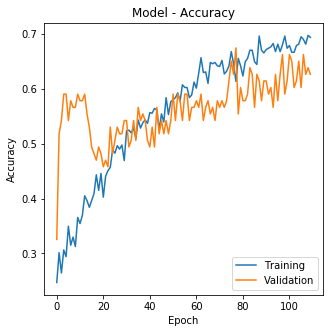

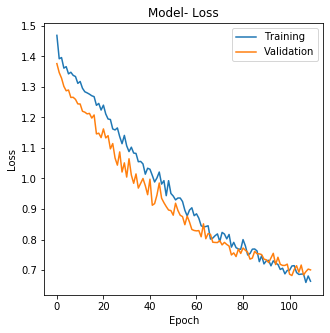

In [75]:
evaluate_model(history,X_test_nns,y_test_nn,model);

Confusion matrix, without normalization


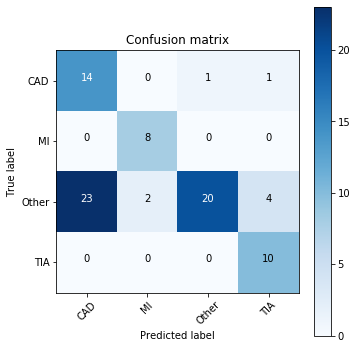

Accuracy: 0.63
F1 Score: 0.70
Precision: 0.70
Recall: 0.82


In [79]:
simplefilter('ignore')
cnf_matrix = confusion_matrix(y_test_nn.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes=['CAD','MI','Other','TIA'], normalize=False,
                      title='Confusion matrix')
plt.show()
print_scores(y_test_nn.argmax(axis=1), y_pred.argmax(axis=1))

The featurized has upwards of a 70% F1 score much like the CNN does after rebalancing.  In cleaning out featurized dataset, our balance of data may have changed a bit.  Let's take a look at training set balance after featurizing.

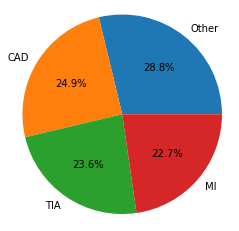

In [87]:
feature_dist = pd.Series(np.argmax(y_train_nn, axis=1)).value_counts()
fig1, ax = plt.subplots(figsize=(4,4))
my_circle=plt.Circle((0,0), 0.7)
ax.pie(feature_dist, labels=['Other','CAD','TIA','MI'],autopct='%1.1f%%')
ax.axis('equal') 
plt.show()

The featurized dataset remained relatively balanced compared to our original dataset imbalance, so finally we are comparing an ANN and CNN trained with balanced data, both of which outperformed original CNN trial.  

We can say our ANN and CNN performed comparably well with an F1 score of each at 70%.  The CNN had better precision at 89% with a recall of only 68%.  Our ANN, on the other hand, had better recall at 82% with a precision only 70%.  Our CNN ran only 15 epochs in 393 seconds whereas our ANN ran for 110 epochs in only 18 seconds to achieve these results.  Model selection may be based on project goals as well as compute time and resource availability.

